In [11]:
import skimage.io as io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from glob import glob
import os
import sys


sys.path.append('../src/')
import trajectory_viz
from getfile_name import get_file_name
from Local_trajectory_analysis_loc import displacement_per_frame

In [12]:
dx=11  #mkm/px

In [13]:
INPUT="../data"
images_segmented=io.imread(get_file_name(INPUT,"segmented"))
nr,nc=images_segmented[0,:,:].shape

File_traj=get_file_name(INPUT,"Traj_data_cleaned_3px_min_area")
df_Traj=pd.read_csv(File_traj)

../data/supplementaryMovie5_ancestor_ALI_segmented.tiff
../data/supplementaryMovie5_ancestor_ALI_Traj_data_cleaned_3px_min_area.csv


In [14]:
df_Traj.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'traj_id', 'point_id', 'frame', 'r', 'c',
       'dist', 'minr', 'minc', 'maxr', 'maxc', 'area', 'major_axis',
       'minor_axis', 'perimeter', 'eccentricity'],
      dtype='object')

## First Derivative across time
Calculate per frame d,dx,dy,d_area

In [15]:
df_delta=pd.DataFrame(columns=["traj_id","dist","dist_x","dist_y","delta_Area"])
for name,group in df_Traj.groupby("traj_id"):
    delta=displacement_per_frame(group)
    #print(delta.shape)
    df_delta=pd.concat([df_delta,delta])    

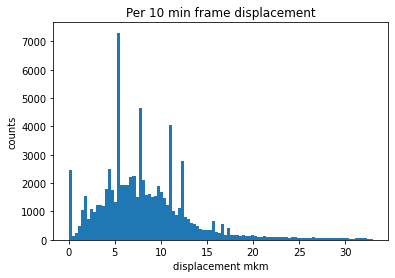

In [19]:
plt.hist(df_delta["dist"]*dx,bins=100);
plt.title("Per 10 min frame displacement")
plt.xlabel("displacement mkm")
plt.ylabel("counts")
plt.savefig("../results/for presentation/Per_frame_displacement"+".png",bbox_inches='tight')

In [21]:
np.sqrt(0.5*600)

17.320508075688775

In [5]:
df_delta.describe()

traj_id          dist        dist_x        dist_y    delta_Area  \
count  78843.000000  78843.000000  78843.000000  78843.000000  78843.000000   
mean    2825.172368      0.758841     -0.028741      0.498369      0.428155   
std     2255.174433      0.473689      0.513531      0.546286      6.608760   
min        1.000000      0.000000     -4.500000     -3.000000    -78.000000   
25%     1089.000000      0.479157     -0.300000      0.177581     -3.000000   
50%     2088.000000      0.699380      0.000000      0.500000      0.000000   
75%     4036.000000      1.000000      0.194805      0.853913      3.000000   
max    10109.000000      2.999507      5.000000      4.600000     84.000000   

              frame  
count  78843.000000  
mean      13.948594  
std        6.841261  
min        1.000000  
25%        8.000000  
50%       14.000000  
75%       20.000000  
max       26.000000

## Cleaning outliers

In [6]:
#Outliers=df_delta.quantile(0.95)
#Outliers.drop(["traj_id","frame","dist_x","dist_y"],inplace=True)


#for (name,k) in zip(Outliers.index,Outliers):
    #print(name,k)
    #df_delta=df_delta[df_delta[name]<k] 
    
#SelectedTraj=df_delta.traj_id.unique()
#df_delta.shape
#SelectedTraj=df_delta.traj_id.unique()

## Correlation dx,dy

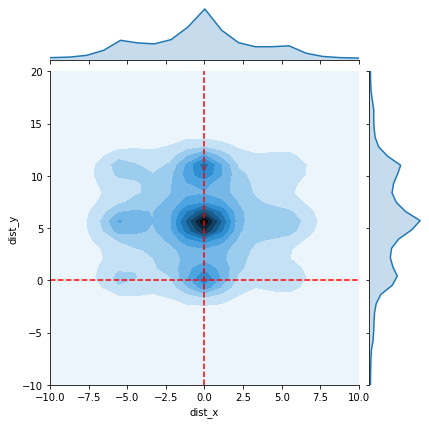

In [39]:
XX=df_delta["dist_x"]*dx
YY=df_delta["dist_y"]*dx
plot=sns.jointplot(x=XX,y=YY,kind='kde')
plot.ax_marg_x.set_xlim(-10,10)
plot.ax_marg_y.set_ylim(-10,20)
plot.ax_joint.axvline(x=0,linestyle='--',color='red')
plot.ax_joint.axhline(y=0,linestyle='--',color='red')
plot.savefig("../results/for presentation/dx_dy_plot"+".png",bbox_inches='tight')

## Dist delta_Area

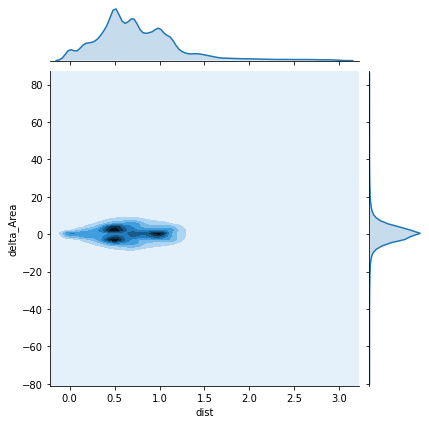

In [40]:
plot=sns.jointplot(x=df_delta["dist"],y=df_delta["delta_Area"],kind='kde')
#plot.ax_marg_x.set_xlim(0,2)
#plot.ax_marg_y.set_ylim(0,20)

## Correlation frame vs delta_Area

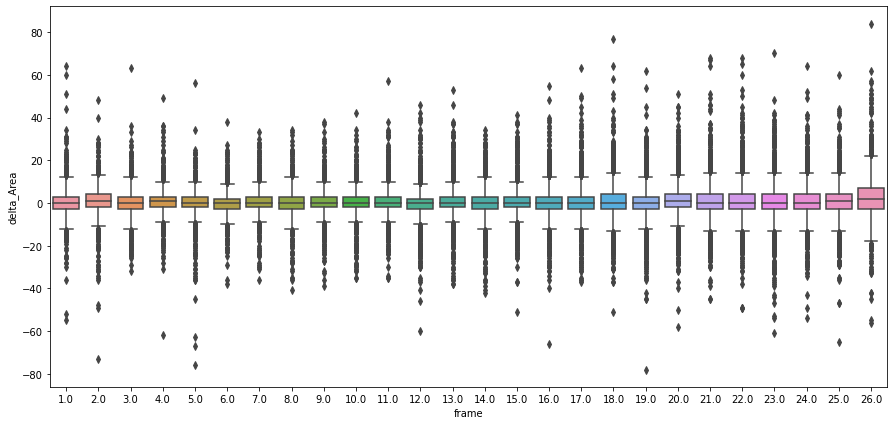

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
plot=sns.boxplot(x="frame", y="delta_Area", data=df_delta)

#plot.ax_marg_x.set_xlim(0,26)
#plot.ax_marg_y.set_ylim(-20,20)

## Correlation frame vs dist

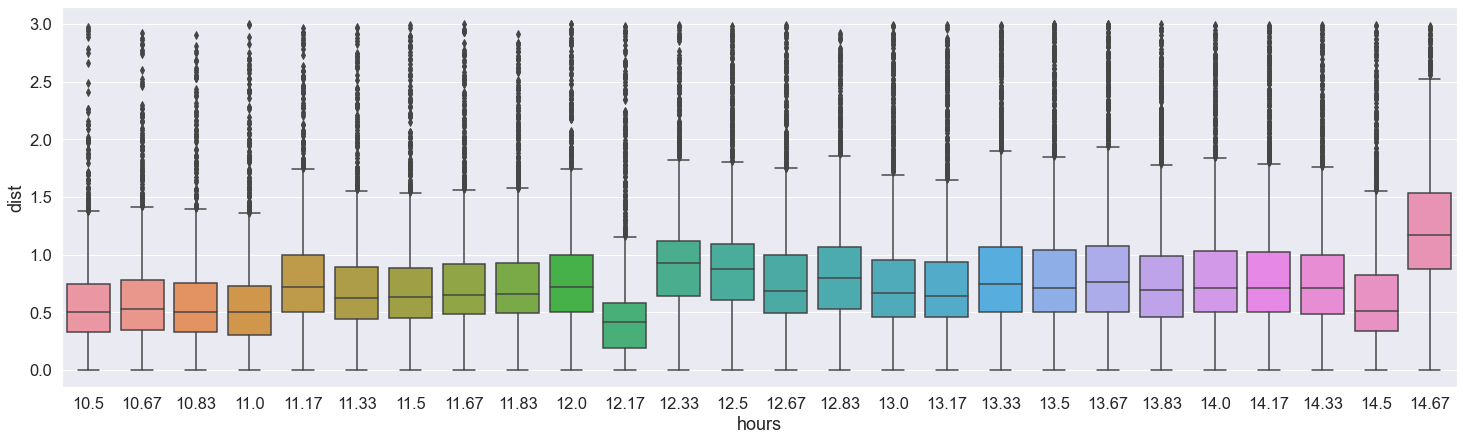

In [16]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(25,7))
df_delta["hours"]=np.round((df_delta["frame"]+62)*10/60,decimals=2)
plot=sns.boxplot(x="hours", y="dist", data=df_delta)

#plot.ax_marg_x.set_xlim(0,29)
#plot.ax_marg_y.set_ylim(0, 50)
#plot.set_ylim(0, 50)
plt.savefig("../results/for presentation/frame_dist_plot"+".png",bbox_inches='tight')

In [54]:
62*10/60

10.333333333333334

In [60]:
df_delta["frame"]

0    15.26
1    15.30
2    15.35
3    15.40
4    15.44
     ...  
0    16.23
1    16.28
2    16.32
3    16.37
4    16.42
Name: frame, Length: 78843, dtype: float64